Author: Roman Ihnatov
Date: Feb 2024
Name: EDA for capstone

Table of content
-  
-

# Exploratory Data Analysis (EDA)

## Introduction
This notebook presents an EDA of a dataset containing immigration information. The analysis includes data loading, cleaning, summary statistics, distribution analysis, and trend analysis over the years.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
raw_data = pd.read_csv("../data/data.csv")

raw_data.sample(5)

,EN_YEAR,EN_QUARTER,EN_MONTH,EN_COUNTRY_OF_CITIZENSHIP,EN_IMMIGRATION_CATEGORY-MAIN_CATEGORY,EN_IMMIGRATION_CATEGORY-GROUP,TOTAL
65782,2021,Q1,Jan,Egypt,Sponsored Family,Sponsored Family,--
59815,2020,Q2,May,Iran,Economic,Business,--
14226,2016,Q2,Apr,Spain,Economic,Provincial Nominee Program,10
1154,2015,Q1,Jan,Lebanon,Economic,Business,5
81537,2022,Q2,Jun,Nigeria,Sponsored Family,Sponsored Family,15


In [36]:
raw_data.duplicated().sum()

9927

In [37]:
raw_data.T.duplicated().sum()

0

## Data Cleaning
Replace `--` with NaN in the 'TOTAL' column and convert it to numeric. Then, handle missing values by filling them with 0.

In [38]:
raw_data['TOTAL'] = pd.to_numeric(raw_data['TOTAL'], errors='coerce')

In [16]:
raw_data.isna().sum()

EN_YEAR                                      0
EN_QUARTER                                   0
EN_MONTH                                     0
EN_COUNTRY_OF_CITIZENSHIP                    0
EN_IMMIGRATION_CATEGORY-MAIN_CATEGORY        0
EN_IMMIGRATION_CATEGORY-GROUP                0
TOTAL                                    50489
dtype: int64

In [39]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101119 entries, 0 to 101118
Data columns (total 7 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   EN_YEAR                                101119 non-null  int64  
 1   EN_QUARTER                             101119 non-null  object 
 2   EN_MONTH                               101119 non-null  object 
 3   EN_COUNTRY_OF_CITIZENSHIP              101119 non-null  object 
 4   EN_IMMIGRATION_CATEGORY-MAIN_CATEGORY  101119 non-null  object 
 5   EN_IMMIGRATION_CATEGORY-GROUP          101119 non-null  object 
 6   TOTAL                                  50630 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.4+ MB


- We have near 50% of data with NaNs and 10% of data looks like full duplicates which is 10%. This is significant.
- But the specification of the data is made by filling "--" in place where it can be from 1 up to 5 people. It is made for purposes of avoiding identification people. So we need to make an assumption of how many people are there in total and replace "--" to 1 and 2 for all 50 630 cells.
- to do so we need to take all NaNs, shuffle them, take a half, fill accordingly with 1 and 2.
- before doing so we neet to see some general statistics and how it will change before and after dealing with NaNs.
- So we can see some issues with data.
1. To deal with it accordingly I need to make a specific query to IRCC to retrieve full data. 

## Summary Statistics

In [40]:
summary_statistics = raw_data.describe()
categorical_summary = raw_data.describe(include=[object])
(summary_statistics, categorical_summary)

(             EN_YEAR         TOTAL
 count  101119.000000  50630.000000
 mean     2019.103986     56.756271
 std         2.603656    213.670893
 min      2015.000000      5.000000
 25%      2017.000000     10.000000
 50%      2019.000000     15.000000
 75%      2021.000000     35.000000
 max      2023.000000   8960.000000,
        EN_QUARTER EN_MONTH EN_COUNTRY_OF_CITIZENSHIP  \
 count      101119   101119                    101119   
 unique          4       12                       215   
 top            Q3      Jun                     India   
 freq        26217     8910                      1565   
 
        EN_IMMIGRATION_CATEGORY-MAIN_CATEGORY EN_IMMIGRATION_CATEGORY-GROUP  
 count                                 101119                        101119  
 unique                                     5                            11  
 top                                 Economic              Sponsored Family  
 freq                                   45936                         32773 

## Distribution Analysis
Analyze the distribution of the 'TOTAL' column.

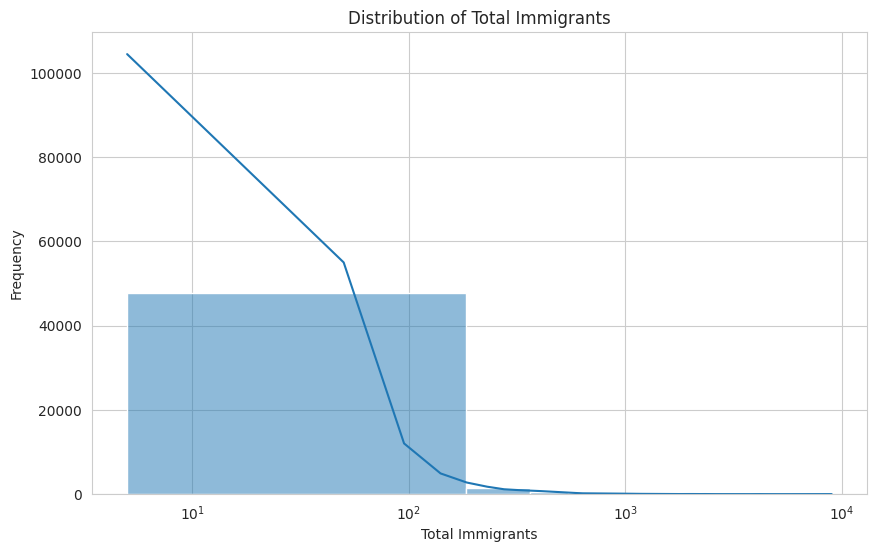

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(raw_data['TOTAL'], bins=50, kde=True)
plt.title('Distribution of Total Immigrants')
plt.xlabel('Total Immigrants')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

## Trend Analysis
Analyze trends over the years in the total number of immigrants.

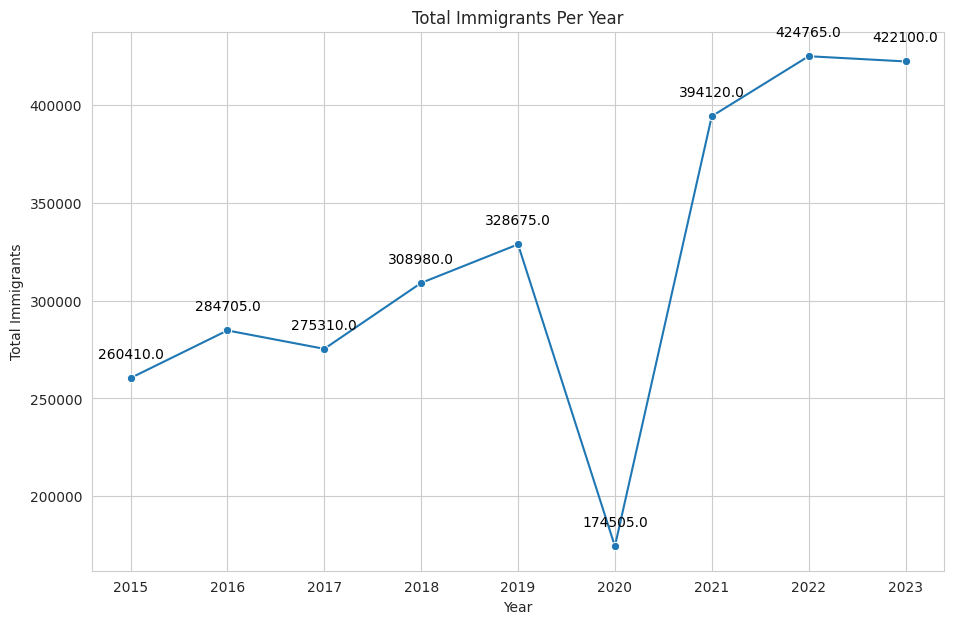

In [48]:
immigrants_per_year = raw_data.groupby('EN_YEAR')['TOTAL'].sum().reset_index()

plt.figure(figsize=(11, 7))
sns.lineplot(data=immigrants_per_year, x='EN_YEAR', y='TOTAL', marker='o')
plt.title('Total Immigrants Per Year')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.xticks(immigrants_per_year['EN_YEAR'])
plt.grid(True)

offset = max(immigrants_per_year['TOTAL']) * 0.02  # Calculate an offset as 1% of the max TOTAL value
for x, y in zip(immigrants_per_year['EN_YEAR'], immigrants_per_year['TOTAL']):
    plt.text(x, y + offset, f'{y}', color='black', ha='center', va='bottom')

plt.show()

We can observe COVID-19 immigration gap.